<a href="https://colab.research.google.com/github/natnew/100-Python-Projects/blob/main/Connections02_EmailAddresses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Creation

The data is created in a dataframe. But this could also be applied to existing data imported into a dataframe. The aim of this graph is to show connections more clearly. This is particularly important with large datasets (BIG DATA). But in this instance we are using a sample dataset. You may want to show connections as a way of determining risk (duplicated data in a database) or for other reasons. 

In [ ]:
import pandas as pd

df = pd.DataFrame({'ID':[1,2,3,4,5,6,7,8,9,10,11,12], 
                   'First Name':['Albert', 'Ben', 'Cathy', 'Dan', 'Eddie','Freddie', 'Jen', 'Jack', 'Dennis', 'Jenifer', 'Penny', 'Rubbie'], 
                   'Family Name': ['Ander','Brooks','Colt','Deen','Evergreen','Revert', 'Den', 'Scott', 'Hull', 'Conrad', 'Donovan', 'Risk'],
                   'Phone number': ['+44 2910987263','+44 8873627192','+44 0987678922', '+44 0987776662','+44 2910987263', '+44 8873627192', '+44 0006728394', '+44 5557773900', '+44 2733425678', '+44 0008192028', '+44 8873627192', '+44 0008192028'],
                   'Email': ['a.ander@gmail.com','b.brooks@gmil.com','cathy.colt@gmail.com','a.ander@gmail.com','b.brooks@gmil.com','freddie.revert@gmail.com', 'jen.den@gmail.com', 'j.same@gmail.com', pd.np.nan, 'j.same@gmail.com', pd.np.nan, pd.np.nan]})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # This is added back by InteractiveShellApp.init_path()


Individuals who have the same phone number are connected using their ID. But this can apply to other bits of information. For exmapl, you may want to connect individuals that share the same last name, address (if that was a data point) and other information. 

In [ ]:
column_edge = 'Phone number'
column_ID = 'ID'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between people who have the same number,
# join data with itself on the 'ID' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [ ]:
data_to_merge

,ID,Phone number,ID_2
0,1,+44 2910987263,1
1,1,+44 2910987263,5
2,5,+44 2910987263,1
3,5,+44 2910987263,5
4,2,+44 8873627192,2
5,2,+44 8873627192,6
6,2,+44 8873627192,11
7,6,+44 8873627192,2
8,6,+44 8873627192,6
9,6,+44 8873627192,11


We can have a look at the data. Grouping similar numbers close together. 

In [ ]:
# By joining the data with itself, people will have a connection with themselves.
# Remove self connections, to keep only connected people who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [ ]:
d

,ID,ID_2,Phone number
1,1,5,+44 2910987263
5,2,6,+44 8873627192
6,2,11,+44 8873627192
9,6,11,+44 8873627192
19,10,12,+44 0008192028


 We will now create the graph. 

In [ ]:
import networkx as nx

G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.ID.tolist())

In [ ]:
G.nodes()

NodeView((1, 5, 2, 6, 11, 10, 12, 3, 4, 7, 8, 9))

We will now connect similar email addresses. 

In [ ]:
column_edge = 'Email'
column_ID = 'ID'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]

d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [ ]:
d

,ID,ID_2,Email
1,1,4,a.ander@gmail.com
5,2,5,b.brooks@gmil.com
12,8,10,j.same@gmail.com


We can view our analysis as a graph using Matplotlib. 

In [ ]:
%matplotlib inline

Each time we run this, we get a new set of connections. 

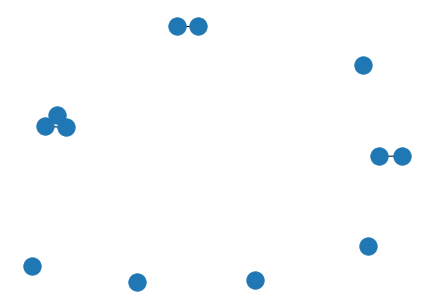

In [ ]:
nx.draw(G)

In [ ]:
{row[column_ID]:row['First Name'] +' '+ row['Family Name'] for i,row in df.iterrows()}

{1: 'Albert Ander',
 2: 'Ben Brooks',
 3: 'Cathy Colt',
 4: 'Dan Deen',
 5: 'Eddie Evergreen',
 6: 'Freddie Revert',
 7: 'Jen Den',
 8: 'Jack Scott',
 9: 'Dennis Hull',
 10: 'Jenifer Conrad',
 11: 'Penny Donovan',
 12: 'Rubbie Risk'}

In [ ]:
nx.set_node_attributes(G, {row[column_ID]:{'Name': row['First Name'] +' '+ row['Family Name']} for i,row in df.iterrows()})

In [ ]:
EDGE_SIZE = {
    'Phone number': 2,
    'Email': 1,
}

EDGE_COLOR = {
    'Phone number': 'purple',
    'Email': 'red',
}

def clean_edge(edge):
    s.edge[edge[0], edge[1]].values()

def c_(list_edges): return [a for a in list_edges if a in list(EDGE_COLOR.keys())]
    
# For nx.Graph()
def edge_sizes(s): return [EDGE_SIZE[c_(list(s.edges[edge[0], edge[1]].keys()))[-1]] for edge in s.edges()] # /!\ multiple links => one size
def edge_colors(s): return [EDGE_COLOR[c_(list(s.edges[edge[0], edge[1]].keys()))[-1]] for edge in s.edges()] # /!\ multiple links => one color

# For nx.MultiDiGraph()
# def edge_sizes(s): return [EDGE_SIZE[s.edge[edge[0]][edge[1]][0]['label']] for edge in s.edges()] # /!\ multiple links => one size
# def edge_colors(s): return [EDGE_COLOR[s.edge[edge[0]][edge[1]][0]['label']] for edge in s.edges()] # /!\ multiple links => one color

def draw(s):
    pos = nx.spring_layout(s, scale=0.5)
    node_labels = dict((n,d['Name']) for n,d in s.nodes(data=True))
#     labels = {**node_labels, **edge_labels}
    nx.draw(s, pos=pos, width=edge_sizes(s), edge_color=edge_colors(s), alpha=0.8, arrows=False, node_color='lightgrey', node_size=400,
            labels=node_labels, 
            font_color='black', font_size=8, font_weight='bold',
           )
    edge_labels = dict(((u,v),list(d.values())[0]) for u,v,d in G.edges(data=True))
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size=8)

KeyError: ignored

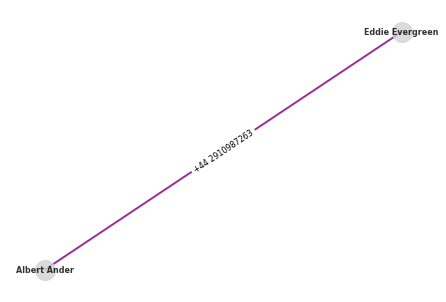

In [ ]:
draw(nx.ego_graph(G=G, n=1, radius=3))

We will now detect peculiar patterns in our data. 

In [ ]:
degrees = list(nx.degree(G))

In [ ]:
pd.DataFrame([list(d) for d in degrees], columns=['ID', 'degree']).sort_values('degree', ascending=False).head(5)

,ID,degree
2,2,2
3,6,2
4,11,2
0,1,1
1,5,1


KeyError: ignored

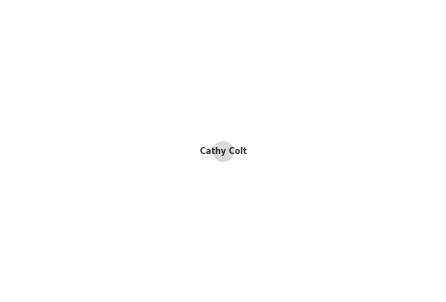

In [ ]:
draw(nx.ego_graph(G=G, n=3, radius=2))

**Thank you Felix Revert** for your insightful article founder here: https://towardsdatascience.com/getting-started-with-graph-analysis-in-python-with-pandas-and-networkx-5e2d2f82f18e